In [1]:
import h5py
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math

import seaborn as sns
import pandas as pd
from itertools import islice

import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#importing data
spectraldata = "/Users/malina/python_codes/spectral_templates_data_version_june20.h5"

pd.read_hdf(spectraldata, key = "binaries")

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [3]:
#defining locations

python_codes = '/Users/malina/python_codes/'
spectraldata = "spectral_templates_data_version_june20.h5"
singles = pd.read_hdf(python_codes + spectraldata , key='singles')
binaries = pd.read_hdf(python_codes + spectraldata, key = 'binaries')
wavelengths = pd.read_hdf(python_codes + spectraldata , key= 'wavegrid')

In [4]:
print(singles)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1    0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2    0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4    0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.004027 -0.007743 -0.004455  0.005451  0.001937 -0.002612  0.002762   
432  0.008489  0.009103 -0.001436  0.010861  0.008182  0.012516  0.011853   
433 -0.004778  0.078588  0.011728 -0.005535  0.033752  0.007601 -0.034531   
434  0.073008  0.009225 -0.005804 -0.039170 -0.014236 -0.015112  0.038132   
435  0.001837 -0.014860 -0.004494  0.012385 -0.003599 -0.001110  0.012853   

       flux_7    flux_8    flux_9  ...  flux_433  flux_434  flux_435  \
0  

In [6]:
#draw any number of binaries from data

def draw_random_binaries_stars(n=400):
    binaries = pd.read_hdf(python_codes+spectraldata, key='binaries')
    binaries = binaries.sample(n)
    return binaries

In [7]:
df_binaries= draw_random_binaries_stars(n=400)

In [8]:
print(df_binaries)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
17174  0.401902  0.465710  0.542253  0.588324  0.636950  0.627804  0.618848   
40440  0.085863  0.093175  0.124723  0.155234  0.181375  0.221938  0.226737   
45939  0.148967  0.160354  0.168914  0.199485  0.214654  0.231230  0.244072   
99126  0.014003  0.018455  0.029420  0.026270  0.009157  0.024972  0.055190   
14875  0.364261  0.392100  0.411779  0.465412  0.469078  0.458589  0.571004   
...         ...       ...       ...       ...       ...       ...       ...   
12104  0.077156  0.067580  0.085309  0.101177  0.081319  0.125246  0.158452   
52022  0.069666  0.085766  0.080874  0.164721  0.106857  0.127332  0.157753   
78309  0.118561  0.119540  0.095238  0.095238  0.095238  0.095238  0.118556   
31114  0.211057  0.237596  0.226273  0.274083  0.290682  0.316113  0.348432   
552    0.152749  0.164958  0.265232  0.201559  0.222637  0.237436  0.247493   

         flux_7    flux_8    flux_9  ...  flux_434 

In [9]:
df_singles = singles

<AxesSubplot:ylabel='Frequency'>

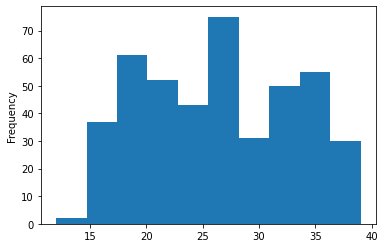

In [10]:
# visualizing data

df_singles.spectral_type.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

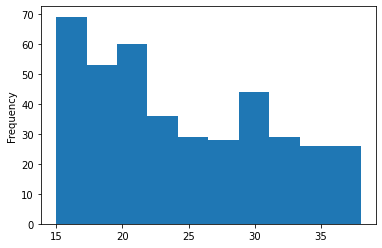

In [11]:
df_binaries.system_type.plot(kind = 'hist')

In [12]:
# change column names

df_newbinaries = df_binaries.rename(columns = {'system_type':'spectral_type'})
print(df_newbinaries)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
17174  0.401902  0.465710  0.542253  0.588324  0.636950  0.627804  0.618848   
40440  0.085863  0.093175  0.124723  0.155234  0.181375  0.221938  0.226737   
45939  0.148967  0.160354  0.168914  0.199485  0.214654  0.231230  0.244072   
99126  0.014003  0.018455  0.029420  0.026270  0.009157  0.024972  0.055190   
14875  0.364261  0.392100  0.411779  0.465412  0.469078  0.458589  0.571004   
...         ...       ...       ...       ...       ...       ...       ...   
12104  0.077156  0.067580  0.085309  0.101177  0.081319  0.125246  0.158452   
52022  0.069666  0.085766  0.080874  0.164721  0.106857  0.127332  0.157753   
78309  0.118561  0.119540  0.095238  0.095238  0.095238  0.095238  0.118556   
31114  0.211057  0.237596  0.226273  0.274083  0.290682  0.316113  0.348432   
552    0.152749  0.164958  0.265232  0.201559  0.222637  0.237436  0.247493   

         flux_7    flux_8    flux_9  ...  flux_434 

In [13]:
#checking for NANS

df_newbinaries.isnull().values.any()

False

In [14]:
df_singles["binary"] = 0
df_newbinaries["binary"] = 1

In [15]:
frames = [df_singles, df_newbinaries]
result = pd.concat(frames)
print(result)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1      0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2      0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3      0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4      0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
...         ...       ...       ...       ...       ...       ...       ...   
12104  0.077156  0.067580  0.085309  0.101177  0.081319  0.125246  0.158452   
52022  0.069666  0.085766  0.080874  0.164721  0.106857  0.127332  0.157753   
78309  0.118561  0.119540  0.095238  0.095238  0.095238  0.095238  0.118556   
31114  0.211057  0.237596  0.226273  0.274083  0.290682  0.316113  0.348432   
552    0.152749  0.164958  0.265232  0.201559  0.222637  0.237436  0.247493   

         flux_7    flux_8    flux_9  ...  flux_436 

In [16]:
from sklearn.model_selection import train_test_split
RSEED = 42  

feats = list(result.columns)
feats.remove('object_name')
feats.remove('primary_type')
feats.remove('secondary_type')

x0 = np.array(result[feats])
y0 = np.array(result['binary'])

print(x0)

[[ 0.4945521   0.56605061  0.61404531 ...  0.20237907 16.
   0.        ]
 [ 0.63451219  0.65755596  0.71488554 ...  0.22477762 12.
   0.        ]
 [ 0.49389331  0.55006927  0.57138003 ...  0.21144832 15.
   0.        ]
 ...
 [ 0.11856086  0.11953951  0.0952381  ...  0.38095238 26.
   1.        ]
 [ 0.21105736  0.23759579  0.22627317 ...  0.27417208 20.
   1.        ]
 [ 0.15274891  0.16495777  0.26523169 ...  0.28732867 21.
   1.        ]]


In [17]:
print(y0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

In [19]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [20]:
from sklearn.metrics import precision_score

test_preds = RF.predict(x_test)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.8716 !


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       104
           1       0.87      0.90      0.89       105

    accuracy                           0.89       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.89      0.89      0.89       209



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_preds)

array([[90, 14],
       [10, 95]])